In [ ]:
import pandas as pd 
data = pd.read_csv('cost_revenue_dirty.csv')
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data.isna().values.any()


False

In [ ]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

<ipython-input-9-1ab4db31a293>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [ ]:
data[data.USD_Production_Budget==1100.0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
zero_domestic = data[data.USD_Domestic_Gross == 0]

In [ ]:
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)


Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

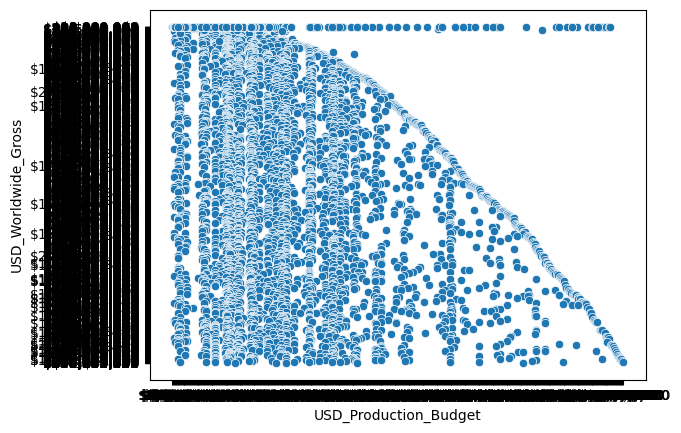

In [ ]:
sns.scatterplot(data = data,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')


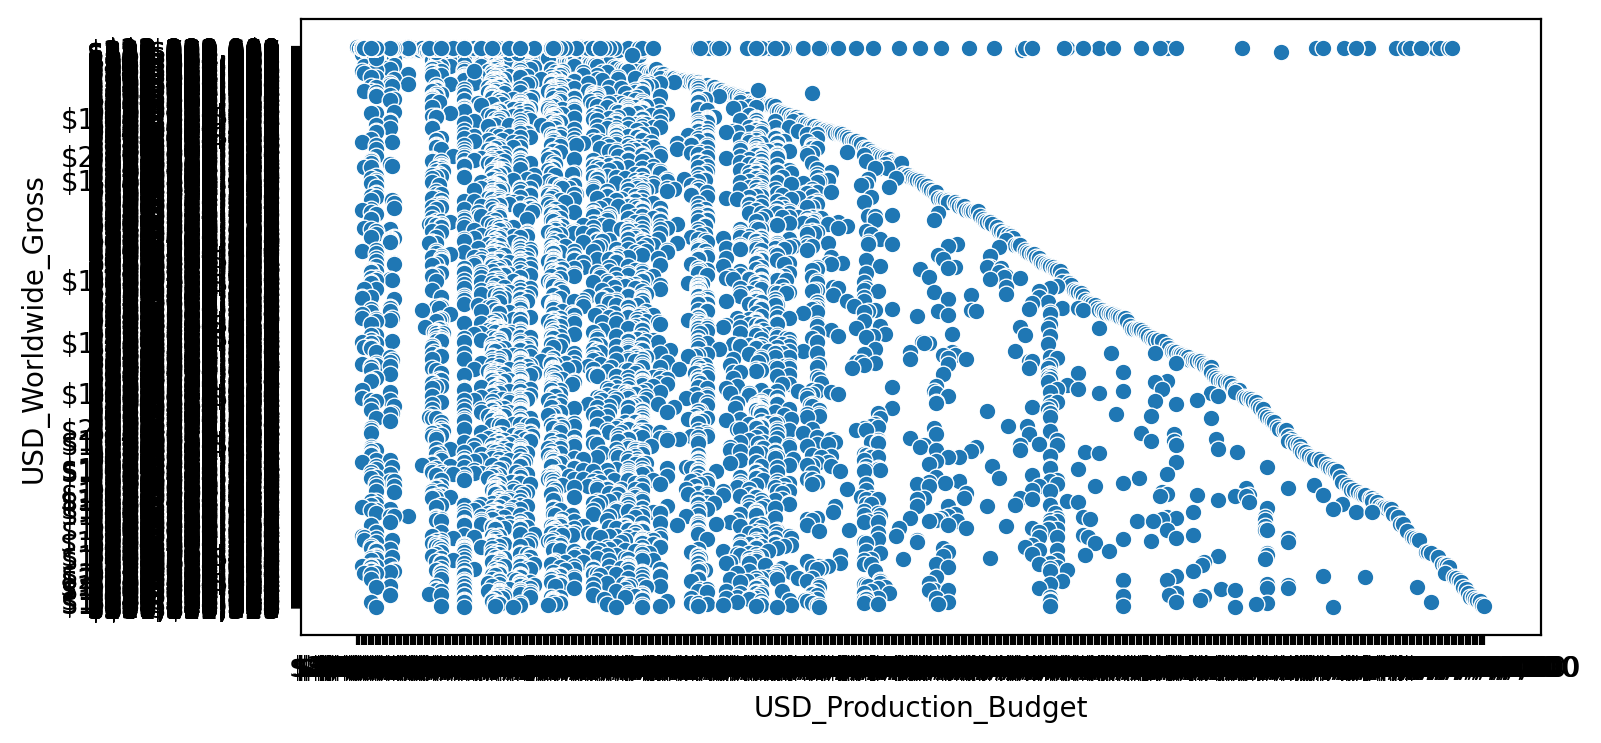

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data = data,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')
plt.show()

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data = data
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

ValueError: ignored

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

SyntaxError: ignored

In [ ]:
float_plt = float(data.USD_Domestic_Gross)

TypeError: ignored

In [ ]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'], downcast='float', errors='coerce')

In [ ]:
print(data.dtypes)

Rank                       int64
Release_Date              object
Movie_Title               object
USD_Production_Budget    float32
USD_Worldwide_Gross       object
USD_Domestic_Gross        object
dtype: object


In [ ]:
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'], downcast='float', errors='coerce')
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'], downcast='float', errors='coerce')


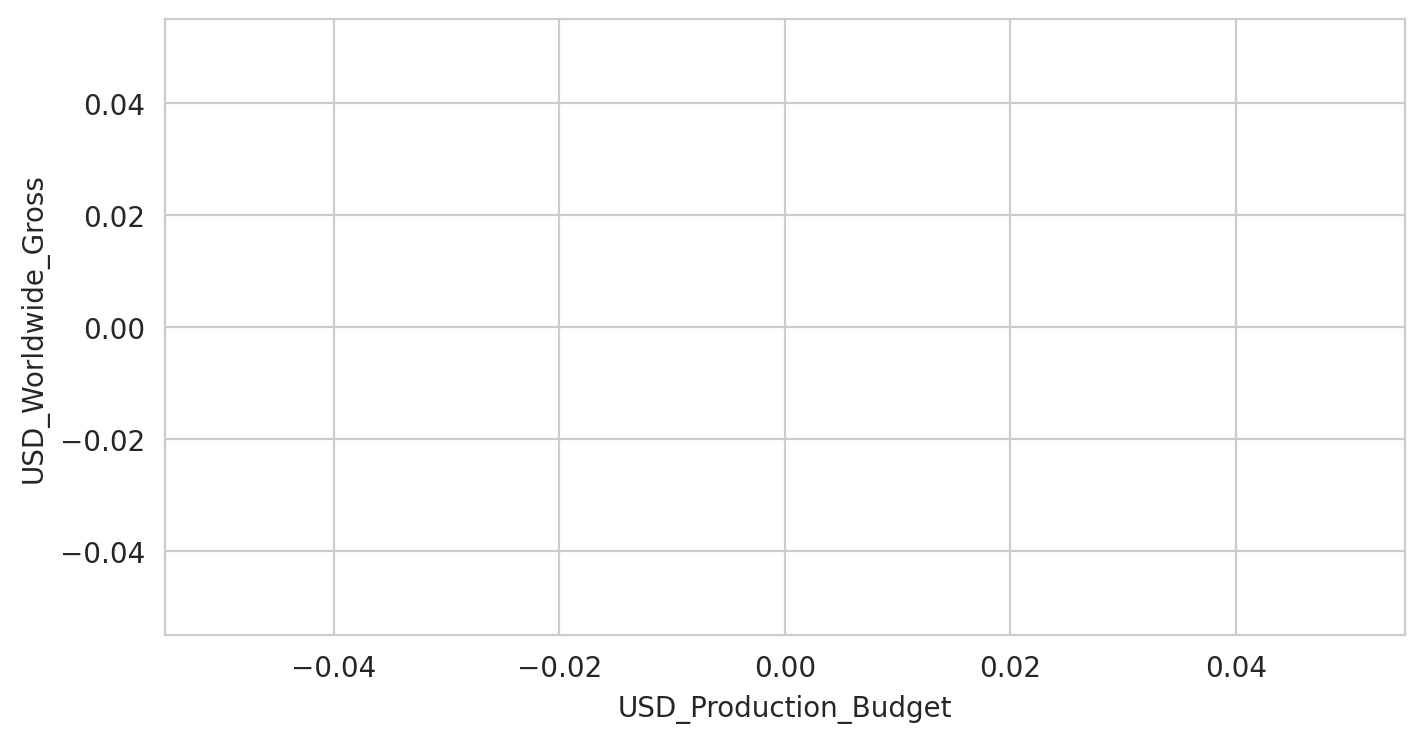

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

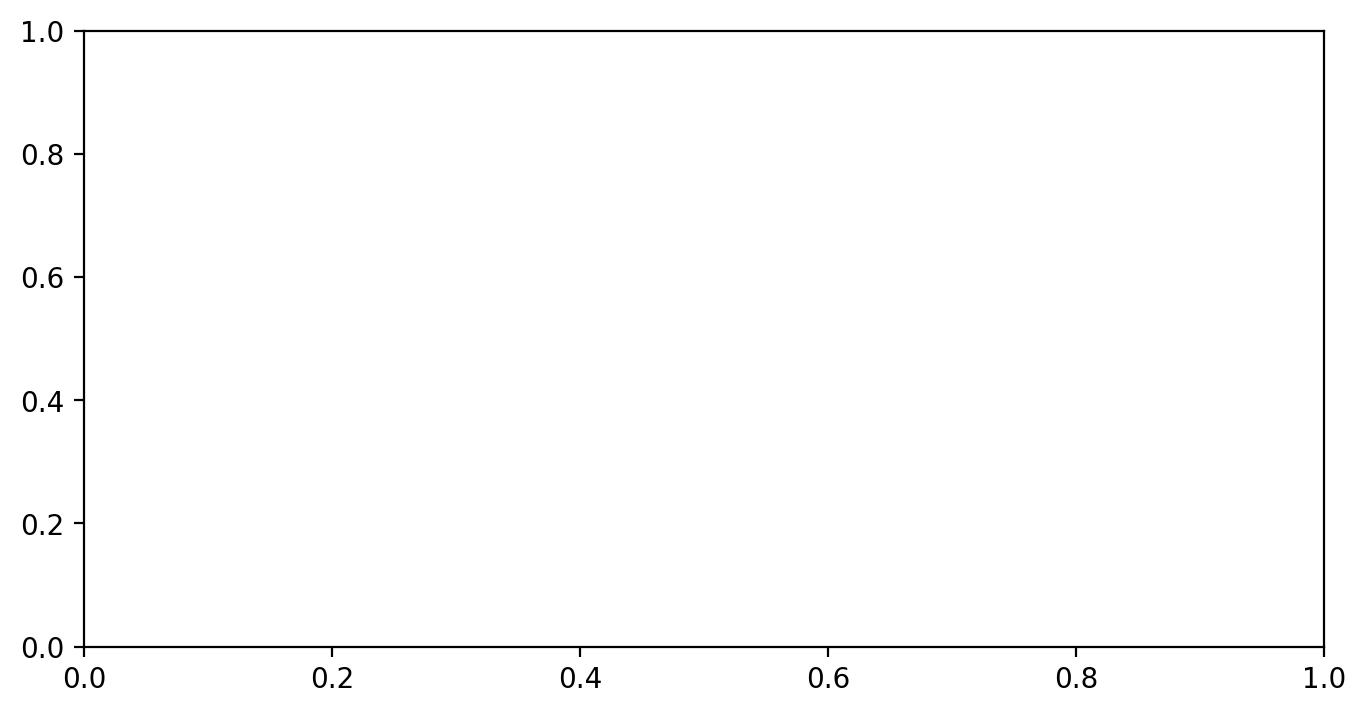

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data = data,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')
plt.show()

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,NaN,NaN,NaN
1,5140,5/9/1916,Intolerance,NaN,NaN,NaN
2,5230,12/24/1916,"20,000 Leagues Under the Sea",NaN,NaN,NaN
3,5299,9/17/1920,Over the Hill to the Poorhouse,NaN,NaN,NaN
4,5222,1/1/1925,The Big Parade,NaN,NaN,NaN
